# <div dir = 'rtl'>کتابخانه های لازم</div>

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# <div dir = 'rtl'>فراخوانی داده ها</div>

In [3]:
data = yf.download('BTC-USD', start='2015-01-01', end='2023-01-01')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]  
data

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800
...,...,...,...,...,...
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,15748580239
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,17005713920


# <div dir = 'rtl'> بررسی متغیر پاسخ </div>

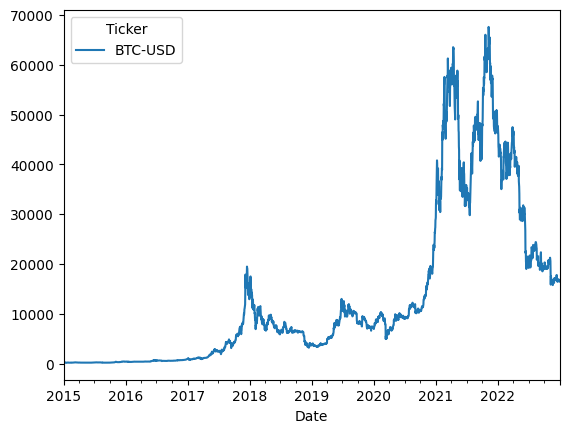

In [5]:
data['Close'].plot();

# <div dir = 'rtl'>استاندارد کردن داده ها برای تحلیل</div>

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# <div dir = 'rtl'> ساخت دنباله برای تحلیل </div>

In [12]:
def create_sequences(data, target_idx, time_steps=60):
    """
    داده ورودی: آرایه 2D شامل تمام متغیرها
    target_idx: اندیس ستون هدف (Close)
    """
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, :])  
        y.append(data[i, target_idx])      
    return np.array(X), np.array(y)

time_steps = 60
target_idx = 3  
X, y = create_sequences(scaled_data, target_idx, time_steps)

# <div dir = 'rtl'>تقسیم داده ها </div>

In [13]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# <div dir = 'rtl'>طراحی مدل <code>LSTM</code></div>

In [ ]:
n_features = X.shape[2] 

model = Sequential()
model.add(Input(shape=(time_steps, n_features)))  
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(80, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# <div dir = 'rtl'>برازش مدل <code>LSTM</code></div>

In [15]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0011 - val_loss: 0.0124
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.1556e-04 - val_loss: 0.0204
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.1595e-04 - val_loss: 0.0230
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.0321e-04 - val_loss: 0.0190
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1.5161e-04 - val_loss: 0.0138
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.8462e-04 - val_loss: 0.0160
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.3130e-04 - val_loss: 0.0166
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.7817e-04 - val_loss: 0.0181
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 1.2143e-04 - val_loss: 0.0087
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.3738e-04 - val_loss: 0.0190
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.1232e-04 - val_loss: 0.0230
Epoch 12/50
65/65 ━━━━━

# <div dir = 'rtl'>پیش بینی مقادیر تست</div>

In [ ]:
predicted = model.predict(X_test)
predicted = predicted.reshape(-1, 1)  
dummy_array = np.zeros((len(predicted), data.shape[1]))
dummy_array[:, target_idx] = predicted[:, 0]  
predicted_actual = scaler.inverse_transform(dummy_array)[:, target_idx]
dummy_test = np.zeros((len(y_test), data.shape[1]))
dummy_test[:, target_idx] = y_test
y_test_actual = scaler.inverse_transform(dummy_test)[:, target_idx]

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


# <div dir = 'rtl'>رسم نمودار مقادیر واقعی در برابر پیش بینی </div>

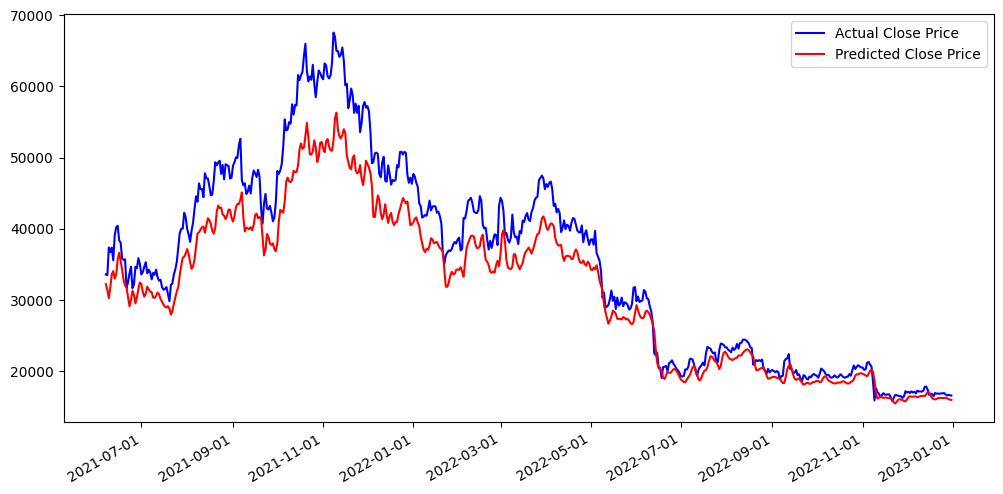

In [33]:
dates = data.index[time_steps:]  
dates_test = dates[train_size:] 
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, color='blue', label='Actual Close Price')
plt.plot(dates_test, predicted_actual, color='red', label='Predicted Close Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

# <div dir = 'rtl'>رسم نمودار <code>Training Loss</code> در برابر <code>Validation Loss</code></div>

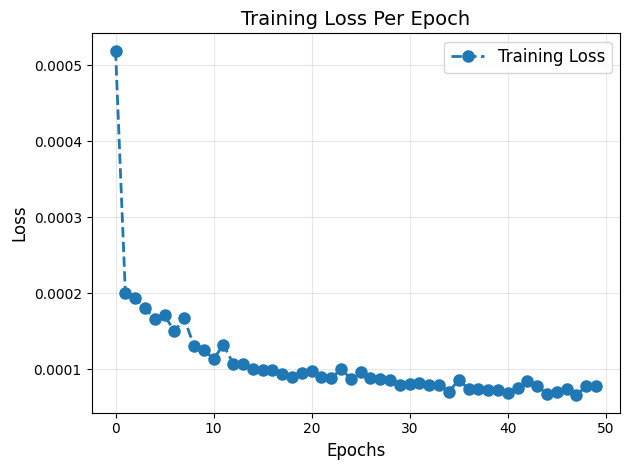

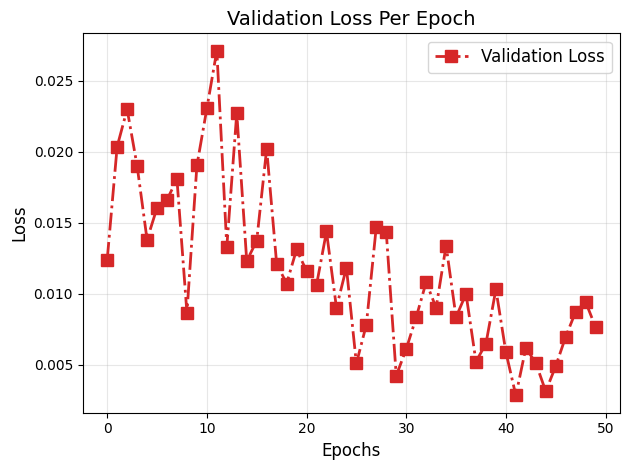

In [29]:
plt.style.use('seaborn-v0_8-deep') 
plt.figure()
plt.plot(history.history['loss'], color='#1f77b4', linestyle='--', linewidth=2, marker='o', markersize=8, label='Training Loss')
plt.title('Training Loss Per Epoch', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
plt.figure()
plt.plot(history.history['val_loss'], color='#d62728', linestyle='-.', linewidth=2, marker='s', markersize=8, label='Validation Loss')
plt.title('Validation Loss Per Epoch', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

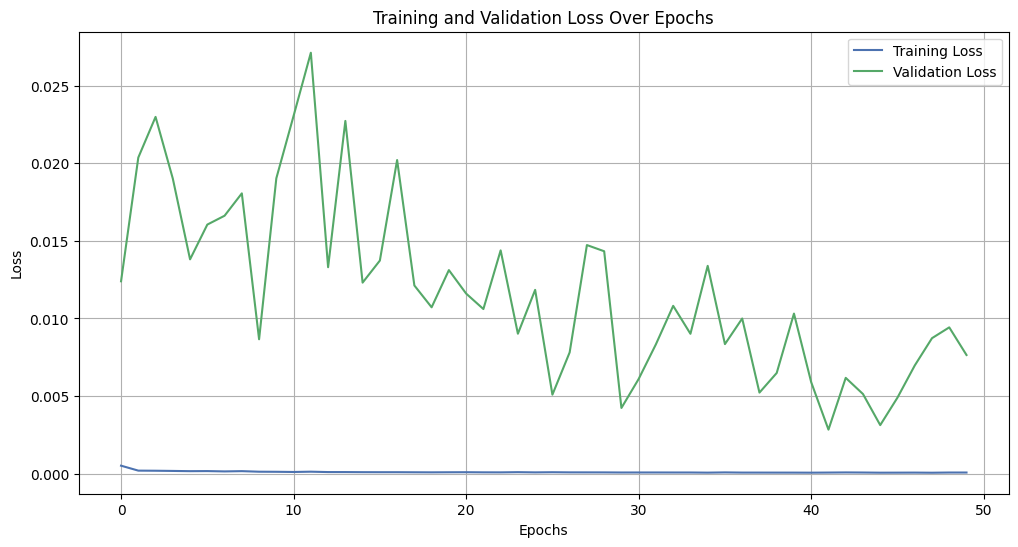

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
! pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
